Tugas Praktikum ML Lab B1

Pertemuan 2

Nama : Sherli Arninda

NIM : 24060122120028

Nama Dataset : Zoo

Link : https://archive.ics.uci.edu/dataset/111/zoo

# **1. Lakukan clustering menggunakan dataset masing-masing (2 fitur atau lebih). Gunakan elbow method untuk menentukan nilai k optimal.**

In [5]:
# Import library
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd

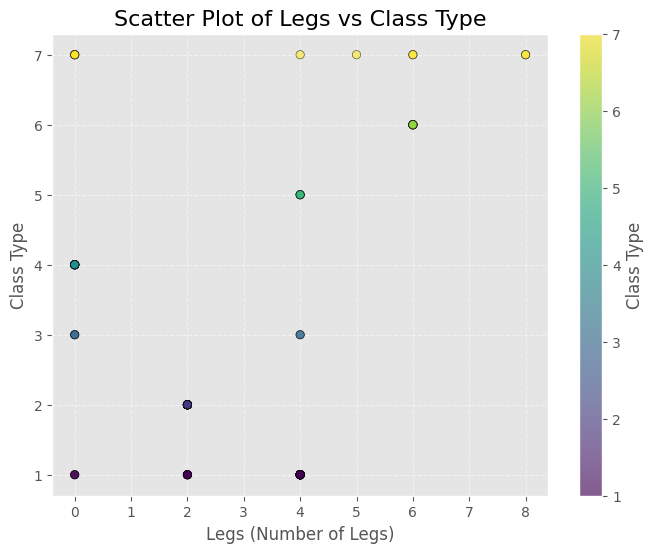

In [6]:
# Load dataset Zoo
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data"  # URL dataset Zoo
columns = [  # Menentukan nama kolom dataset sesuai deskripsi dataset
    'animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
    'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
    'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'
]
data = pd.read_csv(url, header=None, names=columns)  # Membaca dataset Zoo dari URL

# Ekstraksi fitur numerik
features = data[['legs', 'class_type']].to_numpy().T  # Menggunakan fitur 'legs' dan 'class_type'

# Scatter plot dengan warna berdasarkan class_type
plt.figure(figsize=(8, 6))  # Mengatur ukuran figure
plt.scatter(
    features[0], features[1],  # Plotkan fitur 'legs' (x) vs 'class_type' (y)
    c=data['class_type'], cmap='viridis', alpha=0.6, edgecolor='k'  # Warna berdasarkan class_type
)
plt.title('Scatter Plot of Legs vs Class Type', fontsize=16)  # Judul plot
plt.xlabel('Legs (Number of Legs)', fontsize=12)  # Label sumbu x
plt.ylabel('Class Type', fontsize=12)  # Label sumbu y
plt.colorbar(label='Class Type')  # Menambahkan color bar
plt.grid(True, linestyle='--', alpha=0.5)  # Menambahkan grid
plt.show()  # Menampilkan plot


Plot ini menggambarkan hubungan antara jumlah kaki ('legs') dan tipe kelas ('class_type') dari berbagai hewan dalam dataset Zoo. Setiap titik mewakili satu hewan, dengan posisi sumbu x menunjukkan jumlah kaki dan posisi sumbu y menunjukkan tipe kelas hewan.

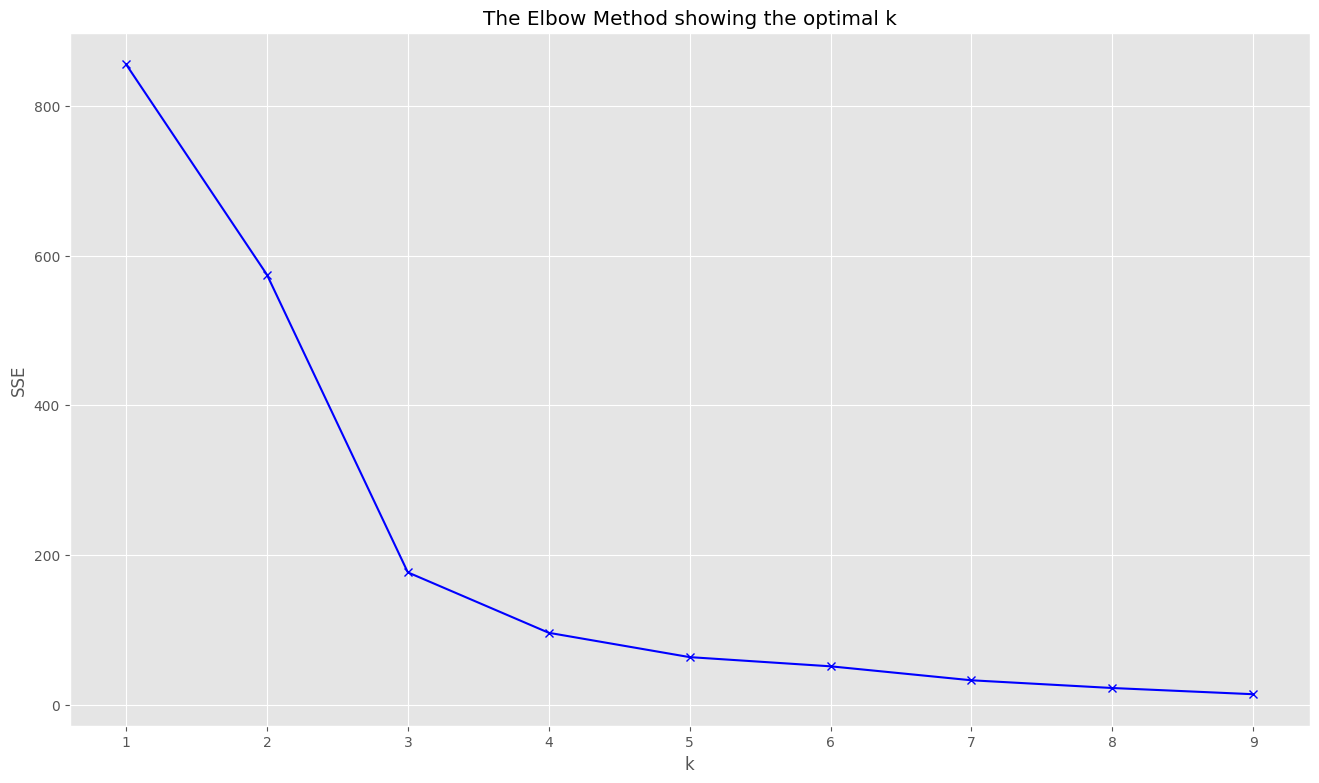

In [7]:
# Membuat array untuk clustering
X = np.array(list(zip(features[0], features[1]))).reshape(len(features[1]), 2)

# Menentukan nilai SSE (Sum of Squared Errors) untuk berbagai nilai k
SSE = []  # List untuk menyimpan nilai SSE
K = range(1, 10)  # Rentang nilai k (1-9)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)  # Membuat model K-Means untuk k tertentu
    kmeanModel.fit(X)  # Fit data ke model
    SSE.append(kmeanModel.inertia_)  # Simpan SSE (inertia)

# Plot metode Elbow untuk menentukan k optimal
plt.plot(K, SSE, 'bx-')  # Plot nilai SSE vs k
plt.xlabel('k')  # Label sumbu x
plt.ylabel('SSE')  # Label sumbu y
plt.title('The Elbow Method showing the optimal k')  # Judul plot
plt.show()  # Menampilkan plot

Berdasarkan grafik Elbow, nilai k yang optimal adalah 3, di mana terdapat "sudut siku" yang signifikan. Hal ini menunjukkan bahwa jumlah cluster terbaik untuk data ini adalah 3.

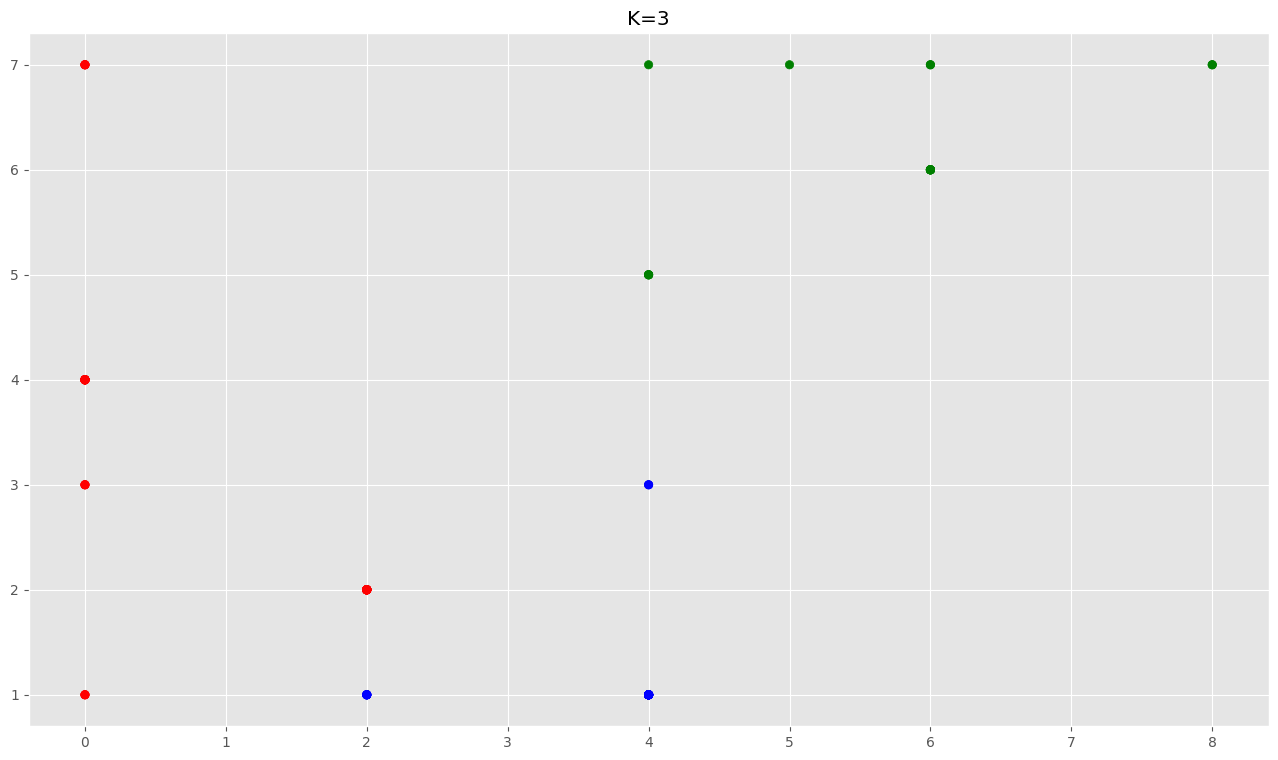

In [8]:
# Clustering dengan k=3 (nilai optimal dari metode elbow)
y_pred = KMeans(n_clusters=3).fit_predict(X)  # Prediksi cluster untuk k=3
plt.plot()  # Membuat plot baru
LABEL_COLOR_MAP = {0: 'r', 1: 'g', 2: 'b'}  # Warna untuk setiap cluster
label_color = [LABEL_COLOR_MAP[l] for l in y_pred]  # Tentukan warna berdasarkan prediksi cluster
plt.scatter(features[0], features[1], c=label_color)  # Scatter plot dengan warna cluster
plt.title("K=3")  # Judul plot
plt.show()  # Menampilkan plot

Setelah melakukan clustering dengan k=3, data berhasil dikelompokkan ke dalam tiga cluster yang berbeda. Warna pada scatter plot menggambarkan anggota masing-masing cluster.

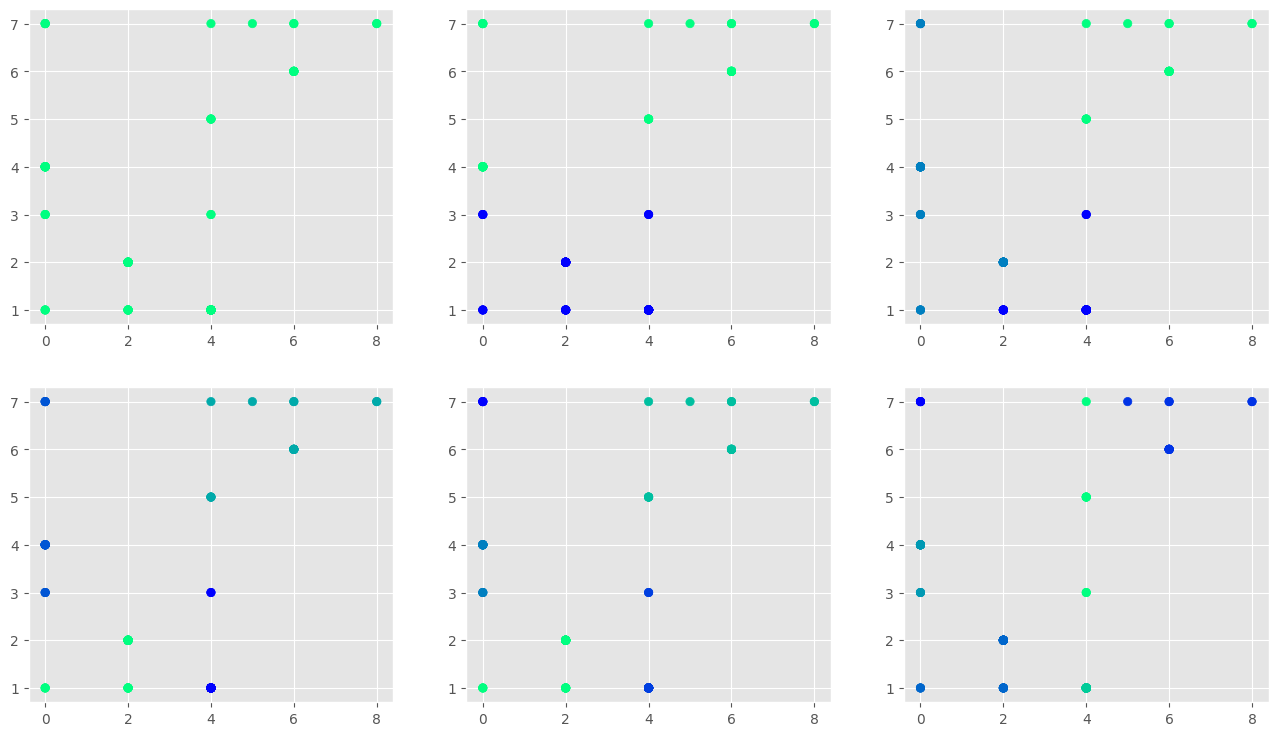

In [9]:
# Membuat subplots untuk visualisasi clustering dengan berbagai nilai k
figure, ax = plt.subplots(2, 3)  # Membuat 2x3 grid subplots
K = range(1, 7)  # Rentang nilai k (1-6)
for k in K:
    if k < 4:  # Menentukan posisi subplot (baris 0 untuk k=1,2,3)
        row = 0
        column = k - 1
    else:  # Baris 1 untuk k=4,5,6
        row = 1
        column = k - 4
    kmeanModel = KMeans(n_clusters=k).fit(X)  # Model K-Means untuk k tertentu
    y_pred = kmeanModel.fit_predict(X)  # Prediksi cluster
    ax[row][column].scatter(features[0], features[1], c=y_pred, cmap='winter_r')  # Scatter plot per cluster

plt.show()  # Menampilkan subplots

Hasil clustering dengan k=1 hingga k=6 divisualisasikan, menunjukkan bagaimana pola pengelompokan berubah dengan bertambahnya jumlah cluster.

# **2. ⁠Lakukan evaluasi hasil clustering menggunakan inertia dan silhouette coefficient**

In [10]:
# Import library
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [28]:
# Mengatur ukuran grafik menjadi 16x9 dan menggunakan style 'ggplot' untuk visualisasi
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Menyediakan URL dataset Zoo dari UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data"  # URL dataset Zoo
columns = [  # Menentukan nama kolom dataset sesuai deskripsi dataset
    'animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
    'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
    'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'
]
# Membaca data dari URL tanpa header dan memberi nama kolom dengan variabel 'columns'
data = pd.read_csv(url, header=None, names=columns)


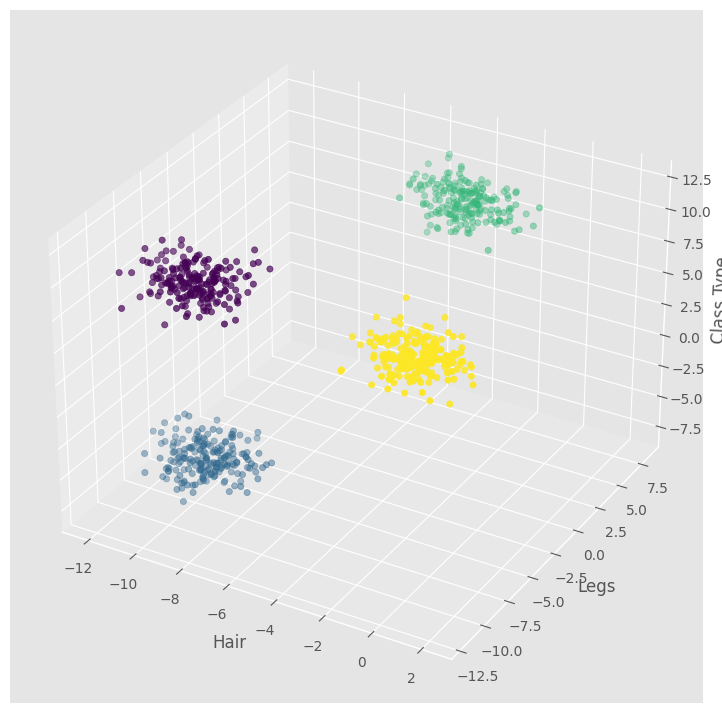

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
plt.rcParams['figure.figsize'] = (16, 9)
# Men-generate dataset yang terkelompok dalam 4 cluster
X, y = make_blobs(n_samples=800, n_features=3, centers=4)
data = {
    'hair': X[:, 0],
    'legs': X[:, 1],
    'class_type': X[:, 2]
}

# Membuat visualisasi 3D hanya menggunakan kolom hair, legs, dan class_type
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['hair'], data['legs'], data['class_type'], c=y, cmap='viridis')

# Memberikan label pada sumbu
ax.set_xlabel('Hair')
ax.set_ylabel('Legs')
ax.set_zlabel('Class Type')

plt.show()

In [37]:
#Melakukan  clustering
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

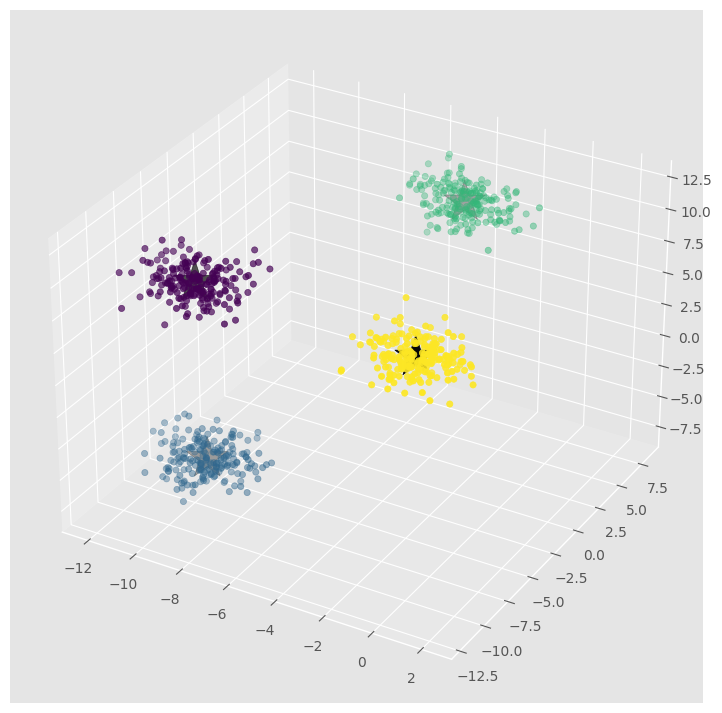

In [38]:
#plot hasil clustering
fig = plt.figure()
ax = ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

In [39]:
#evaluasi hasil clustering dengan inertia
for k in range (1, 10):
 # Menentukan jumlah cluster
 kmeans = KMeans(n_clusters=k, random_state=1)
 # Fitting input data
 kmeans = kmeans.fit(X)
 # Mendapatkan cluster labels
 labels = kmeans.predict(X)
 # Menghitung jumlahan jarak antara setiap sampel dengan cluster centroid-nya (SSE)
interia = kmeans.inertia_
print("k:",k, " cost:", interia)
print("")

k: 9  cost: 1710.8584336332783



Untuk k = 9, nilai inertia adalah 1710.86. Inertia ini menunjukkan jumlah jarak kuadrat antara setiap titik dan centroid cluster-nya. Inertia yang lebih rendah menunjukkan bahwa data lebih terkelompok dengan baik dalam cluster yang lebih padat.

In [40]:
#evaluasi hasil clustering dengan silhouette coefficient
from sklearn.metrics.cluster import silhouette_score
silhouette_score(X, labels)

0.22984654723292158

Pada hasil yang diberikan, silhouette coefficient adalah 0.23. Ini menunjukkan bahwa clustering yang dihasilkan cukup baik